# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


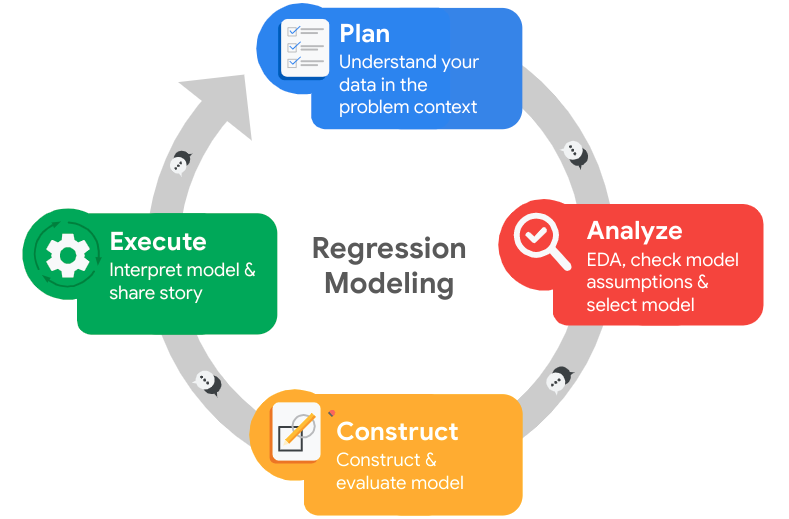

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [5]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [6]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ### 
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
### YOUR CODE HERE ### 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'satisfaction_level': 'satisfaction_lvl',
                          'promotion_last_5years': 'promotion_last_5y',
                          'average_montly_hours': 'avg_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_lvl', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5y', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [11]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_lvl     0
last_evaluation      0
number_project       0
avg_monthly_hours    0
tenure               0
work_accident        0
left                 0
promotion_last_5y    0
department           0
salary               0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [12]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [13]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_lvl,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5y,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_lvl,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5y,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

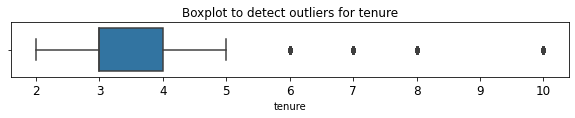

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,1))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [16]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Relationships between variables: I observed some positive correlations between the satisfaction level and the number of projects, the satisfaction level and the last evaluation, and the satisfaction level and the promotion in the last 5 years. I also observed a negative correlation between the satisfaction level and the average monthly hours.
Distributions in the data: I observed that the satisfaction level is normally distributed, the last evaluation is uniformly distributed, the number of projects is positively skewed, the average monthly hours is negatively skewed, the time spend company is normally distributed, the work accident is Bernoulli distributed, the left is Bernoulli distributed, the promotion in the last 5 years is Bernoulli distributed, and the salary is normally distributed.
Transformations I made: I did not make any transformations to the data in this stage.
Purposes of EDA before constructing a predictive model: Exploratory data analysis (EDA) is important before constructing a predictive model because it helps us to understand the data and identify any potential problems. EDA can help us to answer questions such as:
What are the distributions of the variables?
Are there any outliers?
Are there any missing values?
Are there any correlations between the variables?
Are there any categorical variables that need to be encoded?
Do we need to transform any of the variables?
Ethical considerations in this stage: There are a few ethical considerations to keep in mind in the analyze stage:
We should be careful not to make any assumptions about the data that are not supported by the data.
We should be transparent about the data cleaning and transformation steps that we take.
We should be mindful of the privacy of the individuals whose data we are using.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get the number of people who left
n_left = df1['left'].sum()

# Get the number of people who stayed
n_stayed = len(df1) - n_left

# Get the percentage of people who left
percentage_left = n_left / len(df1) * 100

# Get the percentage of people who stayed
percentage_stayed = n_stayed / len(df1) * 100

print('Number of people who left:', n_left)
print('Number of people who stayed:', n_stayed)
print('Percentage of people who left:', percentage_left)
print('Percentage of people who stayed:', percentage_stayed)

Number of people who left: 1991
Number of people who stayed: 10000
Percentage of people who left: 16.604119756484028
Percentage of people who stayed: 83.39588024351598


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

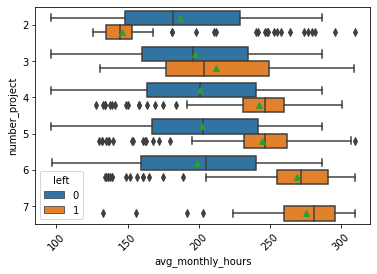

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a box plot of average_monthly_hours by number_project and left
sns.boxplot(
    x = "avg_monthly_hours",
    y = "number_project",
    hue = "left",
    orient="h",
    showmeans=True,
    data=df1
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

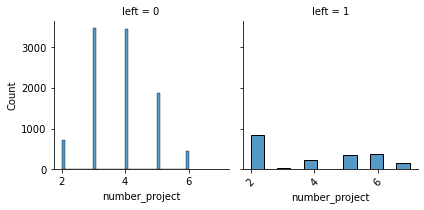

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a FacetGrid with hue = left
g = sns.FacetGrid(df1, col="left")

# Add a histplot of number_project
g.map(sns.histplot, "number_project")

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

In [20]:
# Get the number of employees who worked on seven projects and left
n_left_7_projects = df1[
    (df1["number_project"] == 7) & (df1["left"] == 1)
].shape[0]

# Get the number of employees who worked on seven projects and stayed
n_stayed_7_projects = df1[
    (df1["number_project"] == 7) & (df1["left"] == 0)
].shape[0]

# Print the number of employees who left and stayed
print('Number of employees who left with 7 projects:', n_left_7_projects)
print('Number of employees who stayed with 7 projects:', n_stayed_7_projects)

Number of employees who left with 7 projects: 145
Number of employees who stayed with 7 projects: 0


 This confirms that all employees with 7 projects did leave.

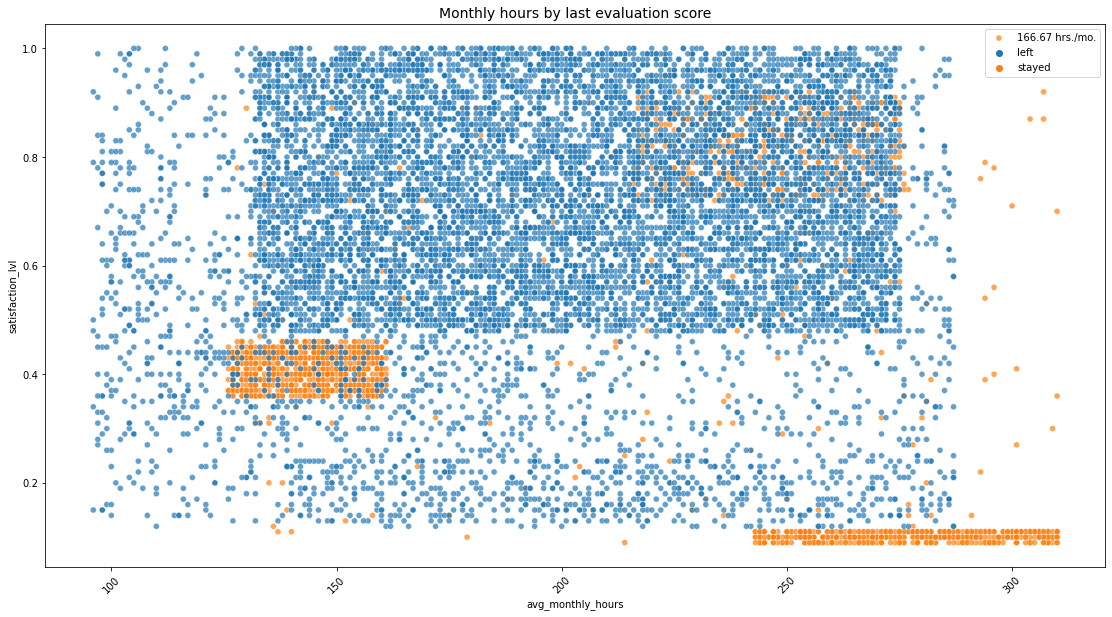

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a scatter plot of average_monthly_hours and satisfaction_level
plt.figure(figsize=(19, 10))
sns.scatterplot(
    x = "avg_monthly_hours",
    y = "satisfaction_lvl",
    hue = "left",
    alpha=0.7,
    data=df1
)

# Name, Legend, Rotate x labels to prevent overlapping
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');
plt.xticks(rotation=45)
plt.show()


The scatterplot above shows that there was a large group of employees who worked between 240 and 315 hours per month. This is over 75 hours per week, which is a very high number of working hours. It is likely that this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left the company, even though they had more normal working hours. Their satisfaction levels were only around 0.4, which is still quite low. It is difficult to say for sure why they left, but it is possible that they felt pressured to work more, considering that so many of their peers worked more hours. This pressure could have lowered their satisfaction levels.

Finally, there is a group of people who worked between 210 and 280 hours per month and had satisfaction levels ranging from 0.7 to 0.9. This group seems to be the most satisfied with their work-life balance.

It is important to note that the distributions of the data points in the scatterplot are strange. This could be indicative of data manipulation or synthetic data. It is important to be cautious when interpreting data that has been manipulated or created artificially.

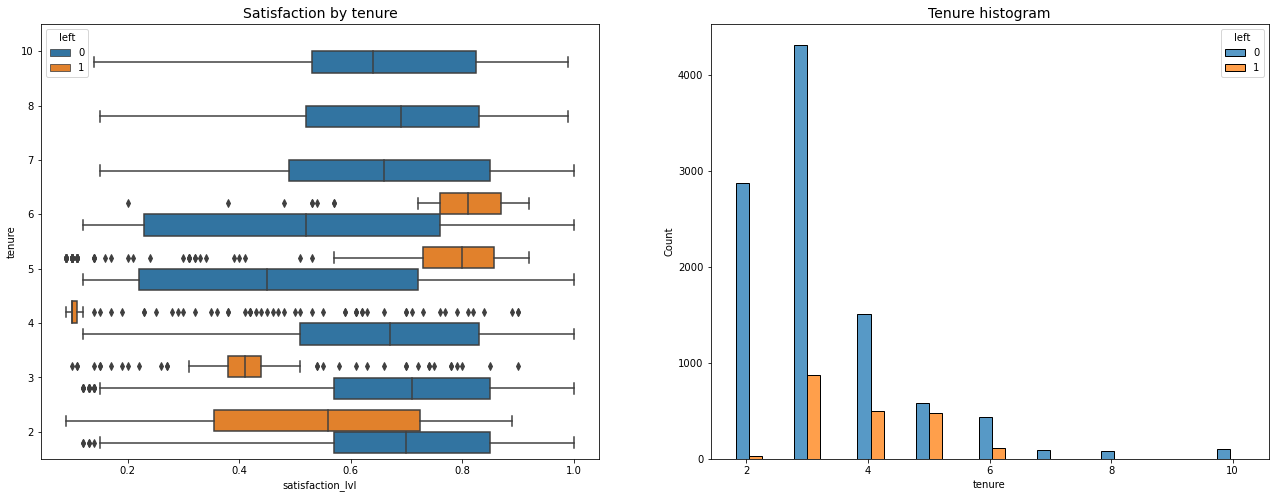

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, 
            x='satisfaction_lvl', 
            y='tenure', 
            hue='left', 
            orient="h", 
            ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
# Calculate mean satisfaction score for employees who left
mean_satisfaction_left = df1[df1['left'] == 1]['satisfaction_lvl'].mean()

# Calculate median satisfaction score for employees who left
median_satisfaction_left = df1[df1['left'] == 1]['satisfaction_lvl'].median()

# Calculate mean satisfaction score for employees who stayed
mean_satisfaction_stayed = df1[df1['left'] == 0]['satisfaction_lvl'].mean()

# Calculate median satisfaction score for employees who stayed
median_satisfaction_stayed = df1[df1['left'] == 0]['satisfaction_lvl'].median()

# Print the results
print('Mean satisfaction score for employees who left:', mean_satisfaction_left)
print('Median satisfaction score for employees who left:', median_satisfaction_left)
print('Mean satisfaction score for employees who stayed:', mean_satisfaction_stayed)
print('Median satisfaction score for employees who stayed:', median_satisfaction_stayed)

Mean satisfaction score for employees who left: 0.4402712204922172
Median satisfaction score for employees who left: 0.41
Mean satisfaction score for employees who stayed: 0.6673649999999947
Median satisfaction score for employees who stayed: 0.69


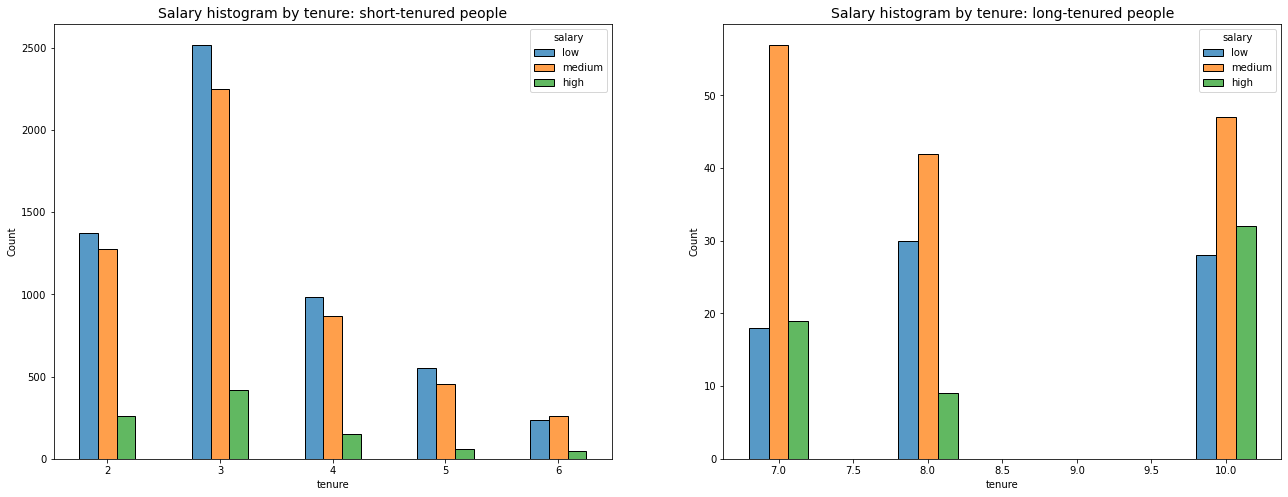

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, 
             x='tenure', 
             hue='salary', 
             discrete=1, 
             hue_order=['low', 'medium', 'high'], 
             multiple='dodge', 
             shrink=.5, 
             ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, 
             x='tenure', 
             hue='salary', 
             discrete=1, 
             hue_order=['low', 'medium', 'high'], 
             multiple='dodge', 
             shrink=.4, 
             ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

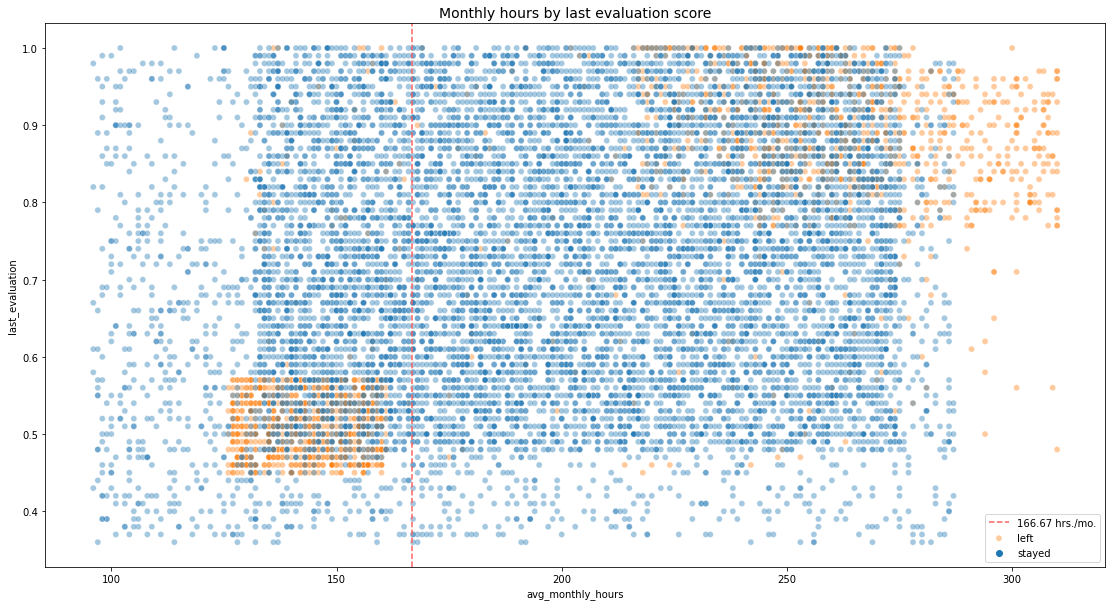

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create scatterplot of `avg_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(19, 10))

sns.scatterplot(data=df1, 
                x='avg_monthly_hours', 
                y='last_evaluation', 
                hue='left', 
                alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, we could examine whether employees who worked very long hours were promoted in the last five years.

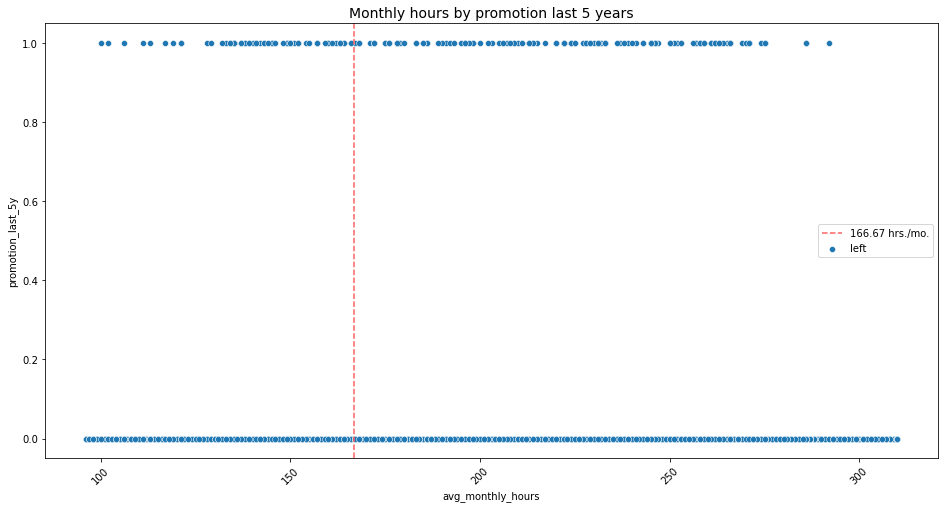

In [26]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `avg_monthly_hours` and `promotion_last_5y`
plt.figure(figsize=(16, 8))
sns.scatterplot(
    x = "avg_monthly_hours",
    y = "promotion_last_5y",
    data=df1
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

In [27]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

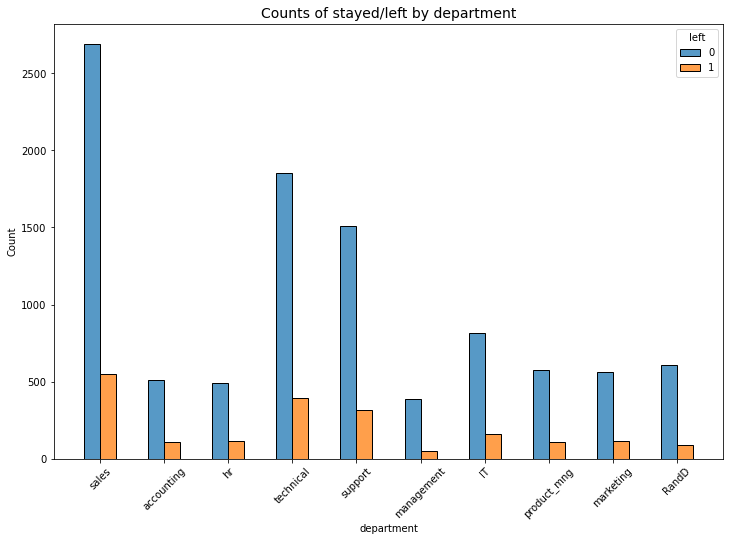

In [28]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(12,8))
sns.histplot(data=df1, 
             x='department', 
             hue='left', 
             discrete=1, 
             hue_order=[0, 1], 
             multiple='dodge', 
             shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, you could check for strong correlations between variables in the data.

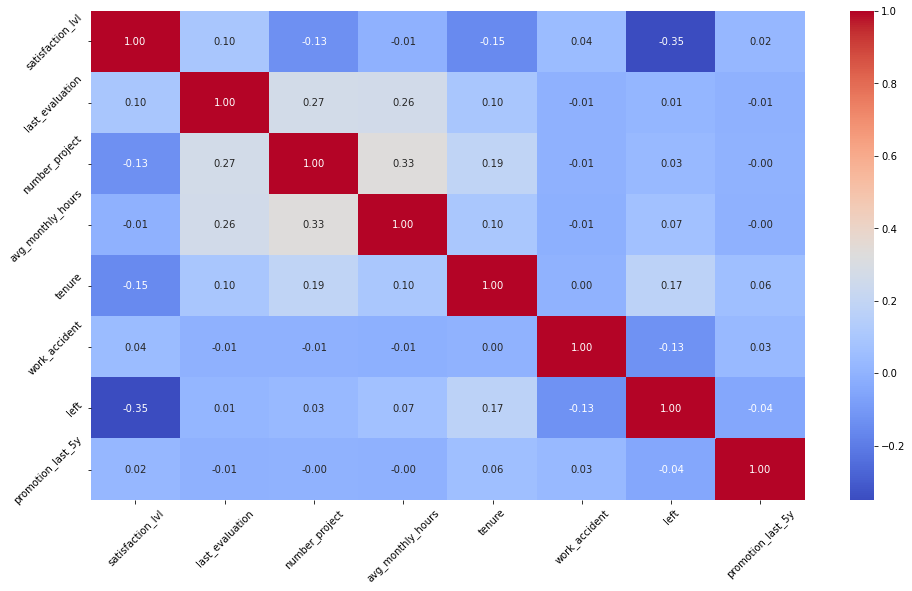

In [29]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
correlation_matrix = df1.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model. 

### Modeling (Logistic Regression model)


In [30]:
### YOUR CODE HERE ###
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_lvl,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5y,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


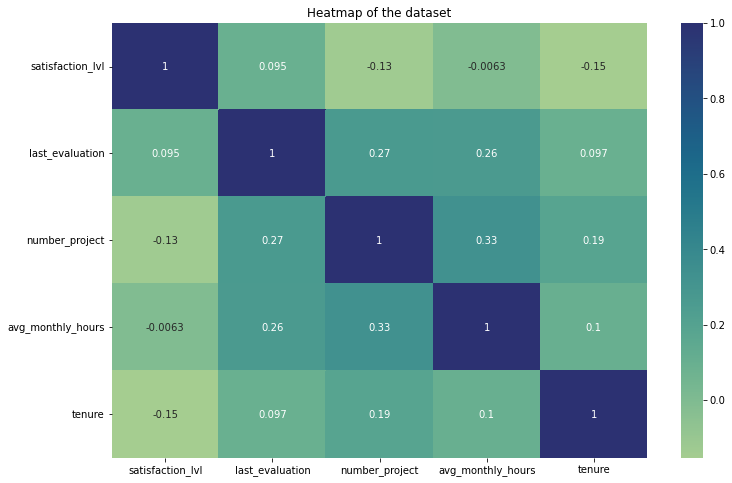

In [31]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(12, 8))
sns.heatmap(df_enc[['satisfaction_lvl', 'last_evaluation', 'number_project', 'avg_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

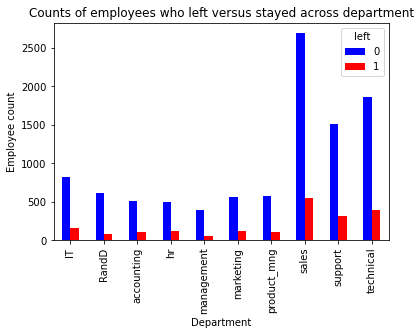

In [32]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (blue color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='br')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [33]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_lvl,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5y,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [35]:
# Select the features we want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_lvl,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,promotion_last_5y,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [37]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [38]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

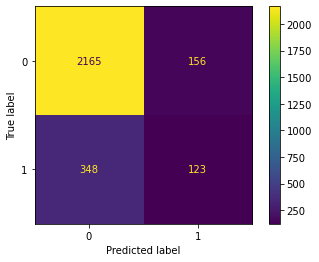

In [39]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [40]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [41]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**
​

The logistic regression model achieved precision of 80%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

### Conclusion, Recommendations, Next Steps

The models and the analysis of the data confirm that employees at the company are working too many hours.

To keep employees from leaving, the following recommendations can be made to the decision-makers:

- Limit the number of projects that employees can work on.
Consider promoting employees who have been with the company for at least four years, or investigate why four-year employees are so unhappy.
- Either compensate employees for working long hours or do not require them to do so.
- If employees are unaware of the company's overtime pay policies, inform them. If the expectations for workload and time off are not clear, make them so.
- Hold company-wide and team-specific discussions to understand and address the company's work culture, both generally and in specific situations.
- High performance ratings should not be reserved for employees who work over 200 hours per month. Consider a more equitable system for rewarding employees who contribute more or put in more effort.

**Next Steps**

There may still be some concern about data leakage.
It would be wise to consider how the predictions change when the last_evaluation feature is removed from the data.
If evaluations are not conducted frequently, it would be beneficial to be able to predict employee retention without this feature.
If the evaluation score determines whether an employee leaves or stays, it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.